# I. Commutators

In order to run pysycomp, please make sure that both SymPy and Matplotlib are installed on your system.

In [1]:
import sys

sys.path.insert(0, '../src')

from pysycomp import *

## 1. Introduction to Commutators

**1.1 Momentum and Position**

In this first example, the momentum operator (defined in pysycomp as `lin_mom(x, exp)` where `x` is the variable of interest, and the position `q` is shown. You can calculate the commutator by using the `comm(commutator_1, commutator_2, aux)` function. The first arguement is the first variable, the second argument is the second variable, and the `aux` argument describes the auxilliary function, usually of the form `f(var)` where `var` represents the variable of interest, which is usually what the first and second variables are with respect to.

In [2]:
p = lin_mom(q, 1)

comm(p, q, f(q))

A non-zero answer shows that both the momentum and position cannot be known simulataneously. 

**1.2 Momentum and Momentum**

Now, we can calculate the commutator between two different momenta, `p` (as defined in part **1**) and `p1`, which is taken with respect to `x`.

In [3]:
p1 = lin_mom(x, 1)

comm(p, p1, f(q))

Since we received `0` as our answer, both momenta can be known simulataneously.

**1.3 Angular Momentum**

Lastly, we can calculate the commutator between two angular momentum operators. Note that this is a two-step process. First, we shall use the `comm()` function as described in the previous two sections. Then, we must simplify further.

In [4]:
L_z, L_y = symbols("L_z, L_y")

xl = comm(L_z, L_y, f(x)).doit()

xl

Now, we are able to simplify the above expression by using the `factorization(var, var)` command where the second argument is the variable in which the auxilliary function (`f(x)`) is taken with respect to.

In [5]:
factorization(xl, x)

## 2. Heisenberg Equations of Motion

We will be using the `ham(p, q)` function, which is the Hamiltonian.

In [6]:
ham(p, q)

Please note that the placeholder of `1` is used when printing the Hamiltonian.

In this example, we will calculate the commutator:

$$[q, H]$$

This represents the commutator between `q`, the position, and `H`, the Hamiltonian. Because we are looking at the position, `q`, the auxilliary function as defined in the next cell is with respect to `q` as well.

In [7]:
aux = Operator(Function("f")(q))

For simplicity, we may take the commutator, using the `time_deriv(var, order)` function as defined in QHD. This function utilizes the `comm` function as described in the previous parts.

In [8]:
time_deriv(q, 1)

We can also take the commutator of `p` and the Hamiltonian, `ham`.

In [9]:
p = Symbol("p")
time_deriv(p, 1)

# II. PIB
## 1. Normalizing Particle in a Box

In [ ]:
import sys

sys.path.insert(0, '../src')

from pysycomp import *

This can be done in one line, using the `PIB()` function, and the `normalization_constant()` function

1. Try running just the `PIB()` function with variables `x`, `L`, and `n`.

2. Now, try normalizing using the `normalization_constant()` function with the same parameters, from `0` to `L`.

Please note the normalization constant provides the *constant* and not the normalized wave function. To get the normalized wave function, multiply the normalization constant with the original wave function.

3. What is the normalized wave function?

The normalized Particle in a Box, although we were able to compute it, is given by the function `PIB_normalize()` with the same parameters as the `PIB()` function. You can check your answers to number 3 by using the below function.

In [ ]:
PIB_normalized(x, L, n)

## 2. Expectation Value of the Position Operator for Particle in a Box

We can also do a simple positional expectation value using the normalized Particle in a Box.

The `expectation_value()` function calculates the expectation value for an operator of interest. In this example we are using the "x", or positional, operator.

4. Find the position (`x`) expectation value of a one dimensional particle in a box from `0` to `L`.

The expectation value is the average value of an operator for a given WaveFunction between certain bounds. This quantity, L/2, for the positional operator, indicates the most likely location to find the particle in a 1-dimensional box at L/2, which is the center of the box.

## Expectation Value of the Kinetic Energy Operator for Particle in a Box

Now, we can calculate the kinetic energy expectation value for a one-dimensional particle in a box.

5. Find the kinetic energy (`kinetic_energy()`) expectation value for a one-dimensional particle in a box from `0` to `L`.

## Graphing the WaveFunction of Particle in a Box

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

Text(0.5, 0, 'Length of Box')

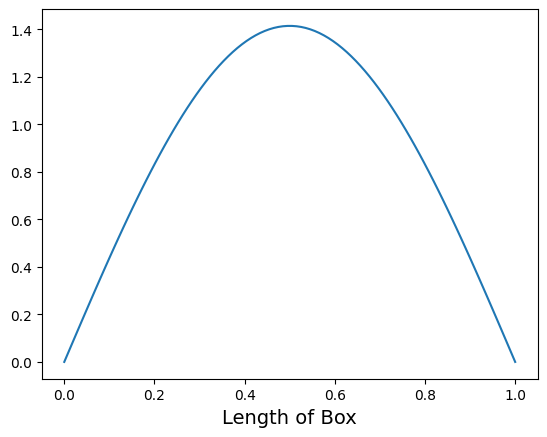

In [ ]:
y = []
n = 1

x = np.linspace(0, 1, 100)
for i in range(0, len(x)):
    y.append(eval(str(PIB_normalized(x[i], 1, n))))
    
plt.plot(x, y)
plt.xlabel("Length of Box", fontsize=14)

6. Plot the wave function for n = 2 for a one-dimensional particle in a box.

## Normalzing 2-Dimensional Particle in a Box

Let's look at a particle in a square box with length `L`. We can use the pre-defined `PIB_2D()` function to calculate this, along with the `normalization_constant()` function used with the one-dimensional box.

In [ ]:
x, y, L_x, L_y = symbols("x, y, L_x, L_y")
n = 1

normalization_constant(PIB_2D(x, y, L, L, n, n), 0, L, x, y)

⎧   2                               
⎪───────  for L > -∞ ∧ L < ∞ ∧ L ≠ 0
⎪   ____                            
⎨  ╱  2                             
⎪╲╱  L                              
⎪                                   
⎩  zoo            otherwise         

## Graphing the WaveFunction of 2-D Particle in a Box

To plot in 3D, the pysycomp function `plot_function()` is used.

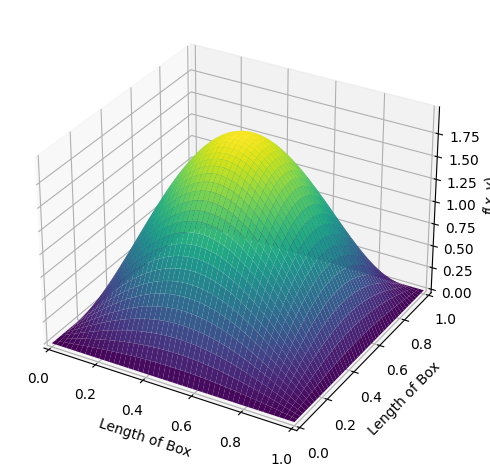

In [ ]:
L = 1
n_x = 1
n_y = 1
x, y = symbols("x, y")

plot_function(PIB_2D_normalized(x, y, L, L, n_x, n_y), 0, L, x, 0, L, y)

7. Plot the three-dimensional wave function for n = 2

## Answers

In [ ]:
x, y, L = symbols("x, y, L")

1.

In [ ]:
PIB(x, L, n)

2.

In [ ]:
normalization_constant(PIB(x, L, n), 0, L, x)

⎧√2                                                                           
⎪──   for (L > -∞ ∨ L > 0) ∧ (L > -∞ ∨ L < ∞) ∧ (L > 0 ∨ L < 0) ∧ (L < 0 ∨ L <
⎨√L                                                                           
⎪                                                                             
⎩zoo                                   otherwise                              

   
 ∞)
   
   
   

3.

In [ ]:
(sqrt(2/L))*PIB(x, L, n)

4.

In [ ]:
expectation_value(PIB_normalized(x, L, n), x, PIB_normalized(x, L, n), 0, L, x)

5.

In [ ]:
expectation_value(PIB_normalized(x, L, n), kinetic_energy(x), PIB_normalized(x, L, n), 0, L, x)

⎧ 2  2                             
⎪π ⋅h̅                             
⎪──────  for L > -∞ ∧ L < ∞ ∧ L ≠ 0
⎨   2                              
⎪2⋅L ⋅m                            
⎪                                  
⎩  0             otherwise         

6.

Text(0.5, 0, 'Length of Box')

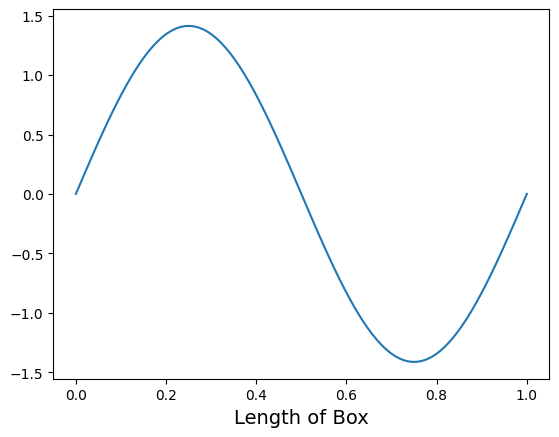

In [ ]:
test = []
n = 2

x = np.linspace(0, 1, 100)
for i in range(0, len(x)):
    test.append(eval(str(PIB_normalized(x[i], 1, n))))
    
plt.plot(x, test)
plt.xlabel("Length of Box", fontsize=14)

7.

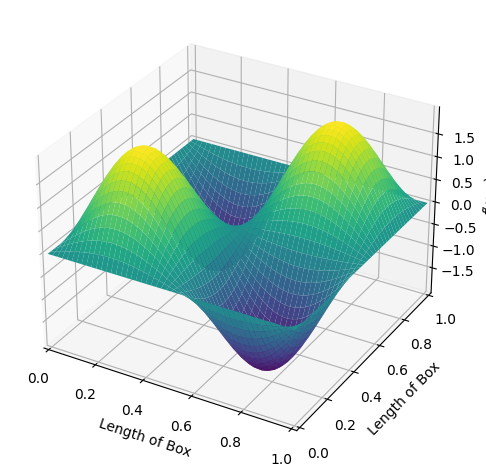

In [ ]:
L = 1
n = 2
x, y = symbols("x, y")

plot_function(PIB_2D_normalized(x, y, L, L, n, n), 0, L, x, 0, L, y)

# III. The Morse Potential

In [ ]:
import sys

sys.path.insert(0, '../src')

from pysycomp import *

import matplotlib.pyplot as plt
import numpy as np

For this first module, we will be looking at a morse potential.

### 1. The Potential

We first must define the potential along with its parameters, as described below for the O-H stretch in a water molecule.

**Parameters**

$D = 4.419 eV$

$\alpha = 2.567 A^{(-1)}$

$q_0 = 0 A$




**Potential**

$V(q) = D*(1-e^{-\alpha(q-q_0)})^2$

We can define this potential as `potential`, and define the given parameters as `D`, `alpha`, and `q_0` as described below. We will also need to define the dependent variable, in this case `q` as a range using the `linspace` function found in `numpy`. The parameters are all in *atomic units*.

In [ ]:
D = 4.419 
D1 = 1
D2 = 10 
alpha = 2.567 # Angstrom(-1) 
q_0 = 0 # Angstrom
q = np.linspace(-10, 10, 1000) # Angstrom

potential = D * (1 - np.exp(-alpha*(q-q_0)))**2
potential1 = D1 * (1 - np.exp(-alpha*(q-q_0)))**2
potential2 = D2 * (1 - np.exp(-alpha*(q-q_0)))**2

# Above values given in QHD paper for water O-H stretch

Now that the parameters and potential have been defined, the potential can be plotted using the `matplotlib.pyplot` library. Any of the lines can be changed as desired.

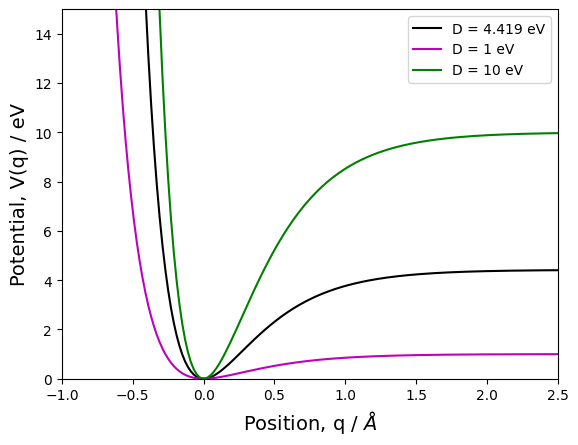

In [ ]:
plt.plot(q, potential, 'k')
plt.plot(q, potential1, 'm')
plt.plot(q, potential2, "g")
plt.legend(["D = 4.419 eV", "D = 1 eV", "D = 10 eV"])

plt.ylim(0, 15) # (Lower, Upper) limit of the y-axis
plt.ylabel("Potential, V(q) / eV", fontsize=14) 
plt.xlim(-1, 2.5) # (Lower, Upper) limit of the x-axis
plt.xlabel("Position, q / $\AA$", fontsize=14)
#plt.savefig('morse_vVq.png') # Save to this file name, as a png file
plt.show()

### 2. Derivation of  QHD formulas

Here, we use the pysycomp library, able to derive the equations of motion in the QHD method. We will need to define the `q`, `p`, `p2`, `x`, `x2`, and `xp` variables. In order to do this, we must first calculate the first and second derivatives of the potential of interest, defined in section 1. We will also use a change of variables as well, described below.

**2.1 The First and Second Derivatives of the Potential**

To take the derivatives, we must represent the potential symbolically. This can be done by:

In [ ]:
# First, we must define all the parameters as stated in section 1 as symbols:

D, alpha, q = symbols("D, alpha, q")
q_0 = 0.0

# When computing symbolically, we do not need to use the numpy exponential function.

potential_sym = D * (1 - exp(-alpha*(q-q_0)))**2

Now that the potential is represented symbolically, we may take the first and second derivatives, described by `diff1` and `diff2`, respectively. Here you can use the `diff` function, which is found in the `sympy` library. This fuction takes the derivative symbolically with respect to the variable of interest, in this case `q`.

In [ ]:
diff1 = diff(potential_sym, q)
diff2 = diff(diff1, q)

diff1, diff2

**2.2 Change of Variable**

We can now perform a change of variables, using `x` to represent the exponential term:

$$x=e^{-\alpha q}$$

And so:

$$V(q)=D[x^2-2x]$$

We will now take the first and second derivatives of the original potential, and then perform the change of variables.

- The First Derivative:

In [ ]:
x = Symbol("x")

diff11 = diff1.replace(exp(-alpha*(q-q_0)), x).replace(exp(-2*alpha*(q-q_0)), x**2)

diff11

- The Second Derivative:

In [ ]:
diff22 = diff2.replace(exp(-alpha*(q-q_0)), x).replace(exp(-2*alpha*(q-q_0)), x**2)

diff22

By performing this change of variables, it makes solving for the equations of motion simpler. We can now solve for the equations of motion, using the new variable `x`.

**2.3 Solving for the Equations of Motion**

We must solve the equations of motion for `q`, `p`, `x`, `x2`, and `xp` using the parameters defined in section 1.

In [ ]:
# Again, we must first define all variables as symbols. #

q, p, p2, x, x2, xp, dt, mass, D, alpha = symbols("q, p, p2, x, x2, xp, dt, mass, D, alpha")
q_0 = 0.0

alp = alpha
aux = f(q)

########## EOM Calculations ##########

px = xp
q1 = str(time_deriv(q, 1)*dt + q)
print("q = " + str(q1))

x = exp(-alpha*q)
x1 = sympify(str(time_deriv(x, 1)).replace("exp(-alpha*q)", "x"))
x1 = str((symmetrize(x1))*(0.5)*dt + Symbol("x"))
print("x = " + str(x1))

p1 = str(time_deriv(p, 1)).replace("v(q)", str(potential_sym))
p1 = expand(sympify(p1).doit())
p1 = str(p1).replace("exp(-2*alpha*q)", "x2")
p1 = sympify(p1)
p1 = str(symmetrize(p1)*(0.5)*dt + p).replace("exp(-alpha*q)", "x")
print("p = " + str(p1))

x = Symbol("x")
p21 = str(time_deriv(p, 2)).replace("v(q)", str(potential_sym))
p21 = expand(sympify(p21).doit())
p21 = str(p21).replace("exp(-alpha*q)", "x").replace("exp(-2*alpha*q)", "x2").replace("alpha**2", "0")
p21 = str(symmetrize(p21)*(0.5)*dt + p2).replace("exp(-alpha*q)", "x").replace("exp(-2*alpha*q)", "x2")
print("p2 = " + str(p21))

### Please note these last two need to be in functions to work properly.

def integrate_x2(q,p,p2,x,x2,xp,dt,mass,alp,D):
    x2 = x2 - 4.0*(alpha/mass)*x*(xp - x*p)*0.5*dt
    x2 = exp(-2.0*alpha*p*dt/mass)*x2
    x2 = x2 - 4.0*(alpha/mass)*x*(xp - x*p)*0.5*dt
    return x2
print("x2 = " + str(integrate_x2(q,p,p2,x,x2,xp,dt,mass,alp,D)))

def integrate_xp(q,p,p2,x,x2,xp,dt,mass,alp,D):
    xp = xp + 0.5*dt*(2.0*alpha*D*(x*(3.0*x2 - 2*x*x) - x2)  - (alpha*x/mass)*(p2 - 2.0*p*p) )
    xp = exp(-2.0*alpha*p*dt/mass)*xp
    xp = xp + 0.5*dt*(2.0*alpha*D*(x*(3.0*x2 - 2*x*x) - x2)  - (alpha*x/mass)*(p2 - 2.0*p*p) )
    return xp
print("xp = " + str(integrate_xp(q,p,p2,x,x2,xp,dt,mass,alp,D)))

q = dt*p/mass + q
x = -0.5*alpha*dt*xp/mass + x
p = dt*(1.0*D*alpha*x2 - 1.0*D*alpha*x) + p
p2 = dt*(-2.0*D*alpha*xp + 2.0*D*alpha*(-2*p*x**2 + p*x2 + 2*x*xp)) + p2
x2 = -2.0*alpha*dt*x*(-p*x + xp)/mass + (-2.0*alpha*dt*x*(-p*x + xp)/mass + x2)*exp(-2.0*alpha*dt*p/mass)
xp = 0.5*dt*(2.0*D*alpha*(x*(-2*x**2 + 3.0*x2) - x2) - alpha*x*(-2.0*p**2 + p2)/mass) + (0.5*dt*(2.0*D*alpha*(x*(-2*x**2 + 3.0*x2) - x2) - alpha*x*(-2.0*p**2 + p2)/mass) + xp)*exp(-2.0*alpha*dt*p/mass)


Now, we are ready to make plots of the data based on the EOM's as computed above.

## 3. Graphing

**3.1 Generating Time-Dependent Values**

We will first define all of the parameters necessary to perform the QHD calculations. The below parameters are defined as followed:

`hbar`: Plancks constant

`convert`: A conversion factor for the mass

`mass`: The mass of the particle in the potential. In this case, the mass of a hydrogen atom is used.

`q0`: The starting position value

`p0`: The starting momentum value

`s0`: The mean width

`ps0`: The mean width momentum

`alp` (`alpha`): A constant in the morse potential

`D`: A constant in the morse potential

`dt`: The time step used

In [ ]:
##### Constants #####

hbar = 0.6582  # eV * fs
convert = (1.0/17.586)

# Feel free to change any of the below parameters to observe what happens when you change them
mass = 2980.0*convert
q0 = 0.15
p0 = 0.0
s0 = 0.05
ps0 = 0.0
alp = 2.567
alpha = alp

dt = 0.1
D = 4.419

**Q1.** Qualitatively, how does the `D` value affect the potential? The `alpha` value?

Below, the initial conditions are described. These initial conditions describe a gaussian wavepacket, and do not need to be changed.

In [ ]:
##### Initial Conditions (Do Not Change) #####

t = 0.0    
Etot = 0.0
Etot0 = 0.0
Etot_cl = 0.0
Etot_cl0 = 0.0
q,p,pq,q2,p2,x,x2,xp,xq = 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0
q, p = q0, p0
q_0 = 0.0
q2 = q*q + s0*s0
pq = ps0*s0 + q*p
p2 = p*p + ps0*ps0 + (0.5*hbar/s0)**2
x = math.exp(-alp*q0)*math.exp(0.5*alp*alp*s0*s0)
x2 = math.exp(-2.0*alp*q0)*math.exp(2.0*alp*alp*s0*s0)
xq = x*(q-alp*s0*s0)
xp = x*(p - s0*ps0*alp)

xp = integrate_xp(q,p,p2,x,x2,xp,0.5*dt,mass,alp,D)
x2 = integrate_x2(q,p,p2,x,x2,xp,0.5*dt,mass,alp,D)
x = eval(x1)
p2 = eval(p21)
p = eval(p1)
q = eval(q1)
p = eval(p1)
p2 = eval(p21)
x = eval(x1)
x2 = integrate_x2(q,p,p2,x,x2,xp,0.5*dt,mass,alp,D)
xp = integrate_xp(q,p,p2,x,x2,xp,0.5*dt,mass,alp,D)

Below, empty lists are created to store the data generated. Feel free to create your own lists to examine how different variables change over time.

In [ ]:
##### Empty Lists for Data Storage: #####

q_list = [] 
p_list = []

**Q2.** Create an empty list for `p2` values and observe how this variable changes over time.

Now that the parameters have been defined, we can compute the desired values of position and momentum over a given time interval.

**Q3.** Try changing the time step (`dt`) or the finish time (`t_f`).

In [ ]:
### Time how long it takes to compute ###

import time 
begin = time.time()
print("Loading...")

### Compute the x values ###

dt = 0.1 # step size
t_i = 0.0 # start
t_f = 1000 # finish

#### --- Do Not Change Anything Below --- #####

### Compute the y values ###

while t_i<=t_f:
    xp = integrate_xp(q,p,p2,x,x2,xp,0.5*dt,mass,alp,D)
    x2 = integrate_x2(q,p,p2,x,x2,xp,0.5*dt,mass,alp,D)
    x = eval(x1)
    p2 = eval(p21)
    p = eval(p1)
    q = eval(q1)
    p = eval(p1)
    p2 = eval(p21)
    x = eval(x1)
    x2 = integrate_x2(q,p,p2,x,x2,xp,0.5*dt,mass,alp,D)
    xp = integrate_xp(q,p,p2,x,x2,xp,0.5*dt,mass,alp,D)

    t_i = t_i + dt

##### --- #####

    # Here is where you add the lists to store data
    
    q_list.append(q)
    p_list.append(p)
        
### Compute the end time ###
    
time.sleep(1)
# store end time
end = time.time()
  
# total time taken
print(f"Total runtime is {end - begin}")

Loading...
Total runtime is 28.23112201690674


For the x values, we create a range with `(t_i, t_f, dt)` as the parameters. Due to the increasing nature of `t_i`, the initial value of `0.0` is used in its place.

In [ ]:
### Define the x values ###

if t_f == 1000 and dt == 0.1:
    t_f = t_f
else:
    t_f = t_f + dt

x_list = np.arange(0.0, t_f, dt)

**3.2 Graphing Position versus Time**

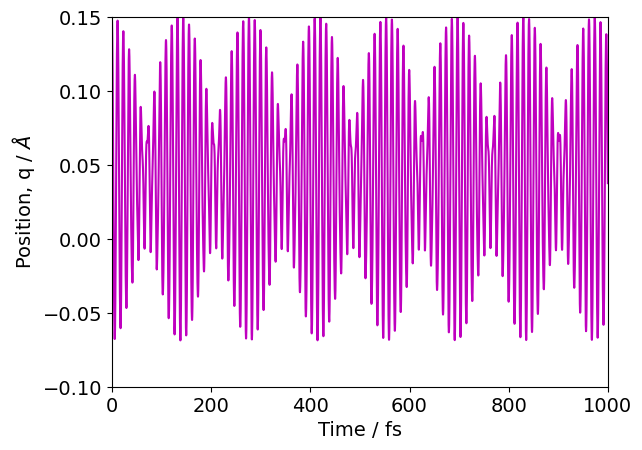

In [ ]:
plt.plot(x_list, q_list, 'm')
plt.xlim(0, t_f)
plt.xlabel("Time / fs", fontsize=14)
plt.ylabel("Position, q / $\AA$", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(-0.10, 0.15)
#plt.savefig("morse_qvt.png")
plt.show()

**3.3 Graphing Momentum versus Time**

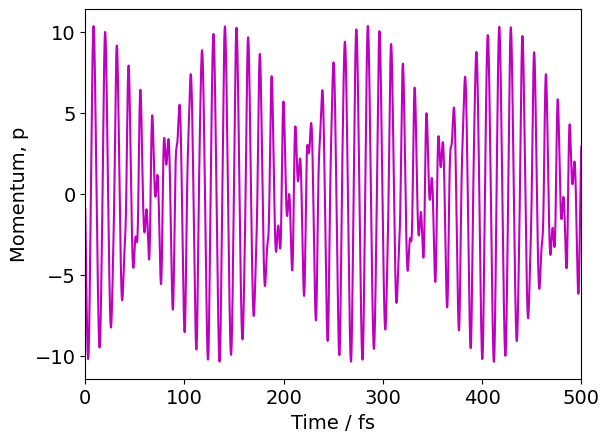

In [ ]:
plt.plot(x_list, p_list, 'm')
plt.xlim(0, 500)
plt.xlabel("Time / fs", fontsize=14)
plt.ylabel("Momentum, p", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.savefig("morse_pvt.png")
plt.show()

**Q4.** How does increasing `D` to `10` affect the position and momentum? What about decreasing to `1`?

## 4. Comparing to Classical Equations of Motion

Here, you will compare classical equations of motion to the QHD equations of motion as described in the previous sections. In order to do this, we must repeat some of the above codes.

In [ ]:
# Again, we must first define all variables as symbols. #

q, p, p2, x, x2, xp, dt, mass, D, alpha = symbols("q, p, p2, x, x2, xp, dt, mass, D, alpha")
q_0 = 0.0

########## Classical EOM Calculations ##########

px = xp
q1 = str(time_deriv(q, 1)*dt + q)
print("q = " + str(q1))


p1 = str(time_deriv(p, 1)).replace("v(q)", str(potential_sym))
p1 = expand(sympify(p1).doit())
p1 = str(p1)
p1 = sympify(p1)
p1 = str(symmetrize(p1)*(0.5)*dt + p)
print("p = " + str(p1))

p21 = str(time_deriv(p, 2)).replace("v(q)", str(potential_sym))
p21 = expand(sympify(p21).doit())
p21 = str(-p21)
p21 = str(symmetrize(p21)*(0.5)*dt + p2)
print("p2 = " + str(p21))

q = dt*p/mass + q
p = dt*(-1.0*D*alpha*exp(-alpha*q) + 1.0*D*alpha*exp(-2*alpha*q)) + p
p2 = dt*(2.0*D*alpha*p*exp(-alpha*q) - 2.0*D*alpha*p*exp(-2*alpha*q)) + p2


In [ ]:
##### Constants #####

hbar = 0.6582  # eV * fs
convert = (1.0/17.586)

# Feel free to change any of the below parameters to observe what happens when you change them
mass = 2980.0*convert
q0 = 0.15
p0 = 0.0
s0 = 0.05
ps0 = 0.0

alp = 2.567
alpha = alp
dt = 0.1 # Step size
D = 4.417

In [ ]:
##### Initial Conditions (Do Not Change) #####

t = 0.0    
Etot = 0.0
Etot0 = 0.0
Etot_cl = 0.0
Etot_cl0 = 0.0
q,p,pq,q2,p2,x,x2,xp,xq = 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0
q, p = q0, p0
q_0 = 0.0
q2 = q*q + s0*s0
pq = ps0*s0 + q*p
p2 = p*p + ps0*ps0 + (0.5*hbar/s0)**2
x = math.exp(-alp*q0)*math.exp(0.5*alp*alp*s0*s0)
x2 = math.exp(-2.0*alp*q0)*math.exp(2.0*alp*alp*s0*s0)
xq = x*(q-alp*s0*s0)
xp = x*(p - s0*ps0*alp)

p2 = eval(p21)
p = eval(p1)
q = eval(q1)
p = eval(p1)
p2 = eval(p21)

In [ ]:
##### Empty Lists for Data Storage: #####

q_list_classical = [] 
p_list_classical = []

In [ ]:
### Time how long it takes to compute ###

import time 
begin = time.time()
print("Loading...")

### Compute the x values ###

t_i = 0.0 # start
t_f = 1000 # finish
dt = 0.1 # timestep


### Compute the y values ###

while t_i<=t_f:

    p2 = eval(p21)

    p = eval(p1)

    q = eval(q1)

    p = eval(p1)

    p2 = eval(p21)


    t_i = t_i + dt
        
    # Here is where you add the lists to store data
    q_list_classical.append(q)
    p_list_classical.append(p)


### Compute the end time ###
    
time.sleep(1)
# store end time
end = time.time()
  
# total time taken
print(f"Total runtime is {end - begin}")

Loading...
Total runtime is 11.883639097213745


In [ ]:
### Define the x values ###

if t_f == 1000 and dt == 0.1:
    t_f = t_f
else:
    t_f = t_f + dt

x_list = np.arange(0, t_f, dt)

We can now plot the classical position and the QHD position on the same graph

**Q5.** Predict qualitatively what the classical motion will look like.

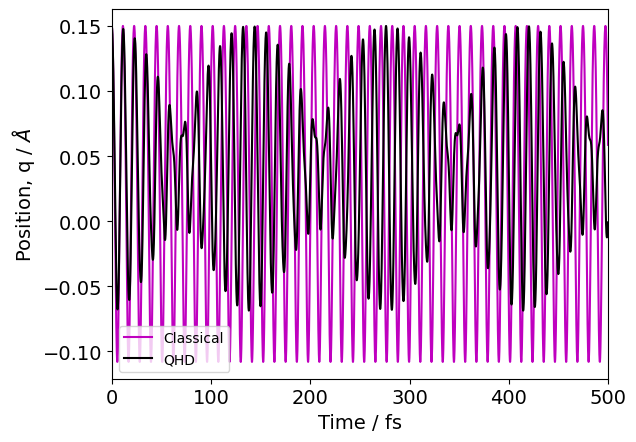

In [ ]:
plt.plot(x_list, q_list_classical, 'm')
plt.plot(x_list, q_list, "k")
plt.legend(["Classical", "QHD"])
plt.xlim(0, t_f)
plt.xlabel("Time / fs", fontsize=14)
plt.ylabel("Position, q / $\AA$", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.savefig("morse_classical_comparison_qvt.png")
plt.show()

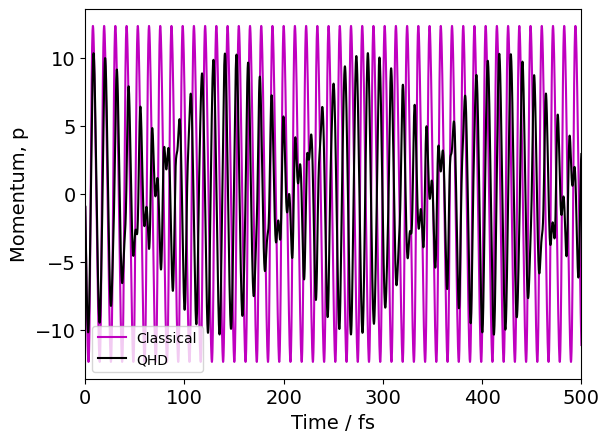

In [ ]:
plt.plot(x_list, p_list_classical, 'm')
plt.plot(x_list, p_list, "k")
plt.legend(["Classical", "QHD"])
plt.xlim(0, t_f)
plt.xlabel("Time / fs", fontsize=14)
plt.ylabel("Momentum, p", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.savefig("morse_classical_comparison_pvt.png")
plt.show()

# IV. The Gaussian Potential

In [ ]:
import sys

sys.path.insert(0, '../src')

from pysycomp import *

import matplotlib.pyplot as plt
import numpy as np

We first must define the potential along with its parameters, as described below, given by Rossman et. al

### 1. The Potential

**Parameters**

$v_0 = 1$ Hartree

$\sigma = 0.1$ Angstrom

**Potential**

$V(q)=-v_0*e^{(\frac{-q^2}{2*\sigma^2})}$

We can define this potential as `potential`, and define the given parameters as `D`, `alpha`, and `q_0` as described below. We will also need to define the dependent variable, in this case `q` as a range using the `linspace` function found in `numpy`. The parameters are all in *atomic units*.

In [ ]:
v_0 = 5 # Hartree
sigma = 0.75 # Angstrom
sigma1 = 1.5

q = np.linspace(-5, 5, 1000)

alpha1 = 1/(2*sigma1**2)
alpha = 1/(2*sigma**2)

potential = -v_0*np.exp(-q**2*alpha)
potential1 = -v_0*np.exp(-alpha1*q**2)

Now that the parameters and potential have been defined, the potential can be plotted using the `matplotlib.pyplot` library. Any of the lines can be changed as desired.

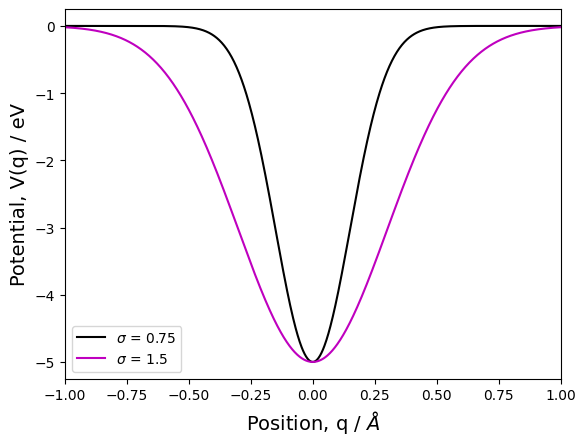

In [ ]:
q = np.linspace(-1, 1, 1000)
plt.plot(q, potential, 'k')
plt.plot(q, potential1, "m")
plt.legend([r"$\sigma$ = 0.75", r"$\sigma$ = 1.5"])
plt.xlim(-1, 1)
plt.xlabel("Position, q / $\AA$", fontsize=14)
plt.ylabel("Potential, V(q) / eV", fontsize=14)
#plt.savefig("gaussian_vVq.png")
plt.show()

### 2. Derivation of  QHD formulas

Here, we use the pysycomp library, able to derive the equations of motion in the QHD method. We will need to define the `q`, `p`, `p2`, `x`, `x2`, and `xp` variables. In order to do this, we must first calculate the first and second derivatives of the potential of interest, defined in section 1. We will also use a change of variables as well, described below.

**2.1 The First and Second Derivatives of the Potential**

To take the derivatives, we must represent the potential symbolically. This can be done by:

In [ ]:
# First, we must define all the parameters as stated in section 1 as symbols:

v_0, sigma, q, alpha = symbols("v_0, sigma q alpha")

# When computing symbolically, we do not need to use the numpy exponential function.

potential_sym = -v_0*exp(-alpha*q**2)


Now that the potential is represented symbolically, we may take the first and second derivatives, described by diff1 and diff2, respectively

In [ ]:
diff1 = diff(potential_sym, q)
diff2 = diff(diff1, q)

diff1, diff2

**2.2 Change of Variable**

We can do a change of variable in the potential to:

$$x=e^{-\alpha*q^2}$$

And so:

$$V(q)=A*x$$

We will now take the first and second derivatives of the original potential, and then perform the change of variables.

- The First Derivative:

In [ ]:
x = Symbol("x")

diff11 = diff1.replace(exp(-alpha*q**2), x)

diff11

- The Second Derivative:

In [ ]:
diff22 = diff2.replace(exp(-alpha*q**2), x)

diff22

**2.3 Solving for the Equations of Motion**

We must solve the equations of motion for `q`, `p`, `x`, `x2`, and `xp` using the parameters defined in section 1.

In [ ]:
# Again, we must first define all variables as symbols. #

q, p, p2, x, x2, xp, dt, mass, D, alpha, sigma, q2 = symbols("q, p, p2, x, x2, xp, dt, mass, D, alpha, sigma q2")
q_0 = 0.0

########## EOM Calculations ##########

# If you want to see the output of any of the below, uncomment the desired print line. #

px = xp
q1 = str(time_deriv(q, 1)*dt + q)
#print("q = " + str(q1))

q21 = str(time_deriv(q, 2)*dt + q2)
#print(q21)

x = exp(-alpha*q**2)
x1 = sympify(str(time_deriv(x, 1)).replace("exp(-alpha*q**2)", "x"))
x1 = str((symmetrize(x1))*(0.5)*dt + Symbol("x"))
x1 = str(x1).replace("p*q*x", "q*xp")
#print("x = " + str(x1))

p1 = str(time_deriv(p, 1)).replace("v(q)", str(potential_sym))
p1 = expand(sympify(p1).doit())
p1 = str(p1).replace("exp(-2.0*q**2)", "x2").replace("alpha**2", "0")
p1 = sympify(p1)
p1 = str(symmetrize(p1)*(0.5)*dt + p).replace("exp(-alpha*q**2)", "x")
#print("p = " + str(p1))

x = Symbol("x")
p21 = str(time_deriv(p, 2)).replace("v(q)", str(potential_sym))
p21 = expand(sympify(p21).doit())
p21 = str(p21).replace("exp(-alpha*q**2)", "x").replace("exp(-2*alpha*q**2)", "x2").replace("alpha**2", "0")
p21 = str(symmetrize(p21)*(0.5)*dt + p2).replace("exp(-alpha*q**2)", "x").replace("exp(-2.0*q**2)", "x2")
p21 = str(p21).replace("p*q*v_0*x", "v_0*q*xp")
#print("p2 = " + str(p21))

### Please note these last two need to be in functions to work properly.
alpha = Symbol("alpha")

def integrate_x2(q,p,pq,q2,p2,x,x2,xp,xq,dt,mass,alp,D):
    x2 = x2 - (q*alpha*x*(xp - x*p))/mass*0.5*dt #4.0*(alp/mass)*x*(xp - x*p)*0.5*dt
    x2 = exp(-2.0*alp*(dt*p/mass)**2)*x2
    x2 = x2 - (q*alpha*x*(xp - x*p))/mass*0.5*dt  #4.0*(alp/mass)*x*(xp - x*p)*0.5*dt
    return x2

def integrate_xp(q,p,pq,q2,p2,x,x2,xp,xq,dt,mass,alp,D):
    xp = xp + 0.5*dt*(alpha*((x*(p2-2*p*p)))/(-2*mass) - (-v_0*x2*2*alpha*q+v_0**2*4*alpha**2*q2*x2))#0.5*dt*(2.0*alp*D*(x*(3.0*x2 - 2*x*x) - x2)  - (alp*x/mass)*(p2 - 2.0*p*p) )
    xp = exp(-2*alpha*(dt*p/mass)**2)*xp
    xp = xp + 0.5*dt*(alpha*((x*(p2-2*p*p)))/(-2*mass) - (-v_0*x2*2*alpha*q+v_0**2*4*alpha**2*q2*x2))#0.5*dt*(2.0*alp*D*(x*(3.0*x2 - 2*x*x) - x2)  - (alp*x/mass)*(p2 - 2.0*p*p) )
    return xp

Now, we are ready to make plots of the data based on the EOM's as computed above.

## 3. Graphing

**3.1 Generating Time-Dependent Values**

We will first define all of the parameters necessary to perform the QHD calculations as followed:

`hbar`: Plancks constant

`convert`: A conversion factor for the mass

`mass`: The mass of the particle in the potential. In this case, the mass of a hydrogen atom is used.

`q0`: The starting position value

`p0`: The starting momentum value

`s0`: The mean width

`ps0`: The mean width momentum

`sigma`: A constant in the guassian potential

`alp` (`alpha`): A constant in the gaussian potential

`D`: A constant in the gaussian potential

`dt`: The time step used

In [ ]:
##### Constants #####

v_0 = 5 # Hartree
sigma = 1.5 # Angstrom
mass = 1836 # a.u.
hbar = 0.6582  # eV * fs
convert = (1.0/17.586)


# Feel free to change any of the below parameters to observe what happens when you change them
mass =  2980.0*convert
q0 = 0.15
p0 = 0.0
s0 = 0.05
ps0 = 0.0

dt = 0.1
alpha = 1/(2*sigma**2)
alp = alpha

**Q1.** How does the `alpha` parameter change the potential, qualitatively?

Below, the initial conditions are described. These initial conditions describe a gaussian wavepacket, and do not need to be changed.

In [ ]:
##### Initial Conditions (Do Not Change) #####

t = 0.0    
Etot = 0.0
Etot0 = 0.0
Etot_cl = 0.0
Etot_cl0 = 0.0
q,p,pq,q2,p2,x,x2,xp,xq = 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0
q, p = q0, p0
q_0 = 0.0
q2 = q*q + s0*s0
pq = ps0*s0 + q*p
p2 = p*p + ps0*ps0 + (0.5*hbar/s0)**2
x = exp(-alp*q0**2)*exp(0.5*alp*alp*s0*s0)
x2 = exp(-2.0*alp*q0**2)*exp(2.0*alp*alp*s0*s0)
xq = x*(q-alp*s0*s0)
xp = x*(p - s0*ps0*alp)

##### ----- #####

xp = integrate_xp(q,p,pq,q2,p2,x,x2,xp,xq,0.5*dt,mass,alp,D)
x2 = integrate_x2(q,p,pq,q2,p2,x,x2,xp,xq,0.5*dt,mass,alp,D)
x = eval(x1)
p2 = eval(p21)
q2 = eval(q21)
p = eval(p1)
q = eval(q1)
p = eval(p1)
q2 = eval(q21)
p2 = eval(p21)
x = eval(x1)
x2 = integrate_x2(q,p,pq,q2,p2,x,x2,xp,xq,0.5*dt,mass,alp,D)
xp = integrate_xp(q,p,pq,q2,p2,x,x2,xp,xq,0.5*dt,mass,alp,D)

Below, empty lists are created to store the data generated. Feel free to create your own lists to examine how different variables change over time.

In [ ]:
##### Empty Lists for Data Storage: #####

q_list = [] 
p_list = []

**Q2.** Create an empty list for `p2` and `q2` values and observe how this variable changes over time.

Now that the parameters have been defined, we can compute the desired values of position and energy over a given time interval.

**Q3.** Try changing the time step (`dt`) or the finish time (`t_f`). For running dissociation, only run for `t_f=19`

In [ ]:
### Time how long it takes to compute ###

import time 
begin = time.time()
print("Loading...")

### Compute the x values ###

dt = 0.1 # step size
t_i = 0.0 # start
t_f = 1000 # finish


#### --- Do Not Change Anything Below --- #####

### Compute the y values ###

while t_i<=t_f:
    xp = integrate_xp(q,p,pq,q2,p2,x,x2,xp,xq,0.5*dt,mass,alp,D)
    x2 = integrate_x2(q,p,pq,q2,p2,x,x2,xp,xq,0.5*dt,mass,alp,D)
    x = eval(x1)
    p2 = eval(p21)
    q2 = eval(q21)
    p = eval(p1)
    q = eval(q1)
    p = eval(p1)
    q2 = eval(q21)
    p2 = eval(p21)
    x = eval(x1)
    x2 = integrate_x2(q,p,pq,q2,p2,x,x2,xp,xq,0.5*dt,mass,alp,D)
    xp = integrate_xp(q,p,pq,q2,p2,x,x2,xp,xq,0.5*dt,mass,alp,D)

    t_i = t_i + dt

##### --- #####

    # Here is where you add the lists to store data
    
    q_list.append(q)
    p_list.append(p)

### Compute the end time ###
    
time.sleep(1)
# store end time
end = time.time()
  
# total time taken
print(f"Total runtime is {end - begin}")

Loading...
Total runtime is 21.93367099761963


For the x values, we create a range with `(t_i, t_f, dt)` as the parameters. Due to the increasing nature of `t_i`, the initial value of `0.0` is used in its place.

In [ ]:
### Define the x values ###

if t_f == 1000 and dt == 0.1:
    t_f = t_f
else:
    t_f = t_f + dt

x_list = np.arange(0, t_f, dt)

**3.2 Graphing Position versus Time**

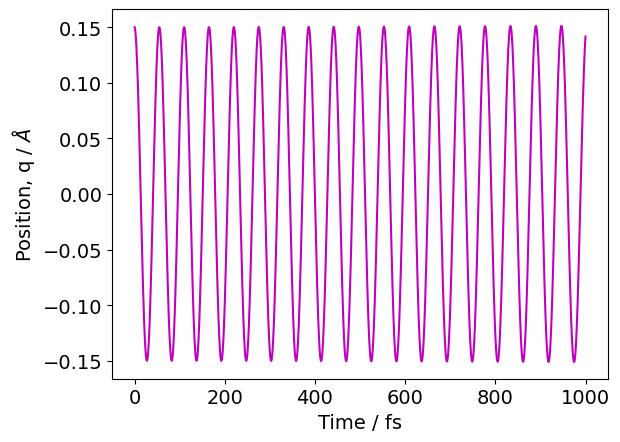

In [ ]:
plt.plot(x_list, q_list, 'm')
plt.xlim(0, t_f)
#plt.ylim(-0.8, 1.5)
plt.xlabel("Time / fs", fontsize=14)
plt.ylabel("Position, q / $\AA$", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.savefig('gaussian_qVt_15.png')
plt.show()

**3.3 Graphing Momentum versus Time**

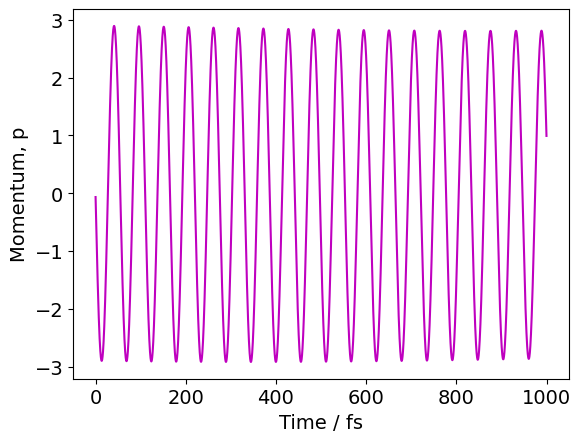

In [ ]:
plt.plot(x_list, p_list, 'm')
plt.xlim(0, t_f)
#plt.ylim(-0.8, 30)
plt.xlabel("Time / fs", fontsize=14)
plt.ylabel("Momentum, p", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.savefig('gaussian_pVt_15.png')
plt.show()

**Q4.** How does increasing `sigma` to `1.5` affect the position and momentum?

**Q5.** How does changing the starting position, `q0`, affect the position versus time? At what value of `q0` does the particle dissociate?

## 4. Comparing to Classical Equations of Motion

Here, you will compare classical equations of motion to the QHD equations of motion as described in the previous sections. In order to do this, we must repeat some of the above codes.

**Q6.** What do you predict the classical plot to look like? The QHD plot?

In [ ]:
# Again, we must first define all variables as symbols. #

q, p, p2, x, x2, xp, dt, mass, D, alpha, sigma, q2 = symbols("q, p, p2, x, x2, xp, dt, mass, D, alpha, sigma q2")
q_0 = 0.0

########## EOM Calculations ##########

# If you want to see the output of any of the below, uncomment the desired print line. #

# There are two ways to derive the EOM's, using the `time_deriv` function and then the original way is with `QHD_int`
# The `time_deriv` function is used as it's more versatile at this time, however it's still not perfect.
# `QHD_int` uses the `time_deriv` function

px = xp
q1 = str(time_deriv(q, 1)*dt + q)
print("q = " + str(q1))

q21 = str(time_deriv(q, 2)*dt + q2)
print(q21)

p1 = str(time_deriv(p, 1)).replace("v(q)", str(potential_sym))
p1 = expand(sympify(p1).doit())
p1 = str(p1)
p1 = sympify(p1)
p1 = str(symmetrize(p1)*(0.5)*dt + p)
print("p = " + str(p1))

p21 = str(time_deriv(p, 2)).replace("v(q)", str(potential_sym))
p21 = expand(sympify(p21).doit())
p21 = str(p21)
p21 = str(symmetrize(p21)*(0.5)*dt + p2)
p21 = str(p21)
print("p2 = " + str(p21))

q = dt*p/mass + q
2*dt*p*q/mass + q2
p = -1.0*alpha*dt*q*v_0*exp(-alpha*q**2) + p
p2 = -2.0*alpha*dt*p*q*v_0*exp(-alpha*q**2) + p2


In [ ]:
##### Constants #####

v_0 = 5 # Hartree
sigma = 0.75 # Angstrom
mass = 1836 # a.u.

# Feel free to change any of the below parameters to observe what happens when you change them
hbar = 0.6582  # eV * fs
convert = (1.0/17.586)
mass =  2980.0*convert
q0 = 0.15
p0 = 0.0
s0 = 0.05
ps0 = 0.0

dt = 0.1
alpha = 1/(2*sigma**2)
alp = alpha

In [ ]:
##### Initial Conditions (Do Not Change) #####

t = 0.0    
Etot = 0.0
Etot0 = 0.0
Etot_cl = 0.0
Etot_cl0 = 0.0
q,p,pq,q2,p2,x,x2,xp,xq = 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0
q, p = q0, p0
q_0 = 0.0
q2 = q*q + s0*s0
pq = ps0*s0 + q*p
p2 = p*p + ps0*ps0 + (0.5*hbar/s0)**2
x = exp(-alp*q0)*exp(0.5*alp*alp*s0*s0)
x2 = exp(-2.0*alp*q0)*exp(2.0*alp*alp*s0*s0)
xq = x*(q-alp*s0*s0)
xp = x*(p - s0*ps0*alp)

##### ----- #####

p2 = eval(p21)
q2 = eval(q21)
p = eval(p1)
q = eval(q1)
p = eval(p1)
q2 = eval(q21)
p2 = eval(p21)

In [ ]:
##### Empty Lists for Data Storage: #####

q_list_classical = [] 
p_list_classical = []

In [ ]:
### Time how long it takes to compute ###

import time 
begin = time.time()
print("Loading...")

### Compute the x values ###

dt = 0.1 # step size
t_i = 0.0 # start
t_f = 1000 # finish


### Compute the y values ###

while t_i<=t_f:

    p2 = eval(p21)
    q2 = eval(q21)
    p = eval(p1)
    q = eval(q1)
    p = eval(p1)
    q2 = eval(q21)
    p2 = eval(p21)

    t_i = t_i + dt
    
    # Here is where you add the lists to store data
    q_list_classical.append(q)
    p_list_classical.append(p)

### Compute the end time ###
    
time.sleep(1)
# store end time
end = time.time()
  
# total time taken
print(f"Total runtime is {end - begin}")

Loading...
Total runtime is 9.537335872650146


In [ ]:
if t_f == 1000 and dt == 0.1:
    t_f = t_f
else:
    t_f = t_f + dt

x_list_classical = np.arange(0, t_f, dt)

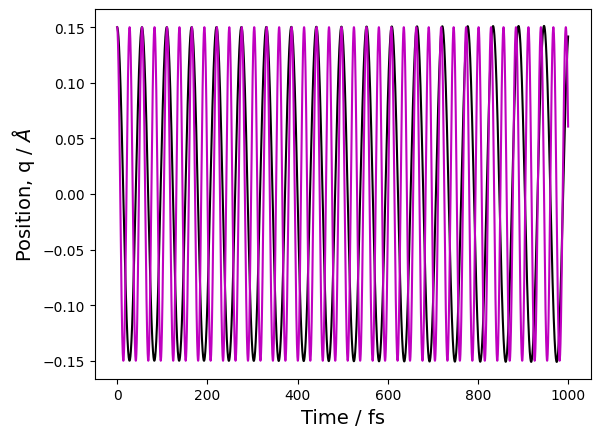

In [ ]:
plt.plot(x_list, q_list, 'k')
plt.plot(x_list_classical, q_list_classical, "m")
plt.xlim(0, t_f)
plt.xlabel("Time / fs", fontsize=14)
#plt.ylim(-2, 1.5)
plt.ylabel("Position, q / $\AA$", fontsize=14)
#plt.savefig('gaussian_qVt_classical_dissoc.png')
plt.show()

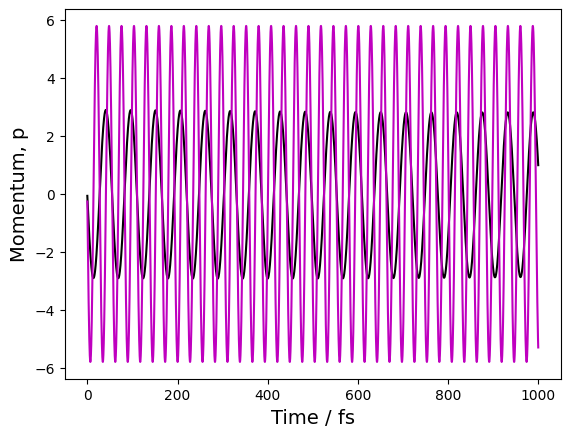

In [ ]:
plt.plot(x_list, p_list, 'k')
plt.plot(x_list_classical, p_list_classical, "m")
plt.xlim(0, t_f)
plt.xlabel("Time / fs", fontsize=14)
#plt.ylim(-30, 40)
plt.ylabel("Momentum, p", fontsize=14)
#plt.savefig('gaussian_pVt_classical_dissoc.png')
plt.show()

# V. The Double Well Potential

In [ ]:
import sys

sys.path.insert(0, '../src')

from pysycomp import *

import matplotlib.pyplot as plt
import numpy as np

**1. The Potential**

We first must define the potential along with its parameters, as described below.

**Parameters**

$m=1836$ This is mass

$\lambda=m$ This is a constant which can be set equal to the mass, `m`, or any other value

$B=2$ This is simply a constant which can be changed as well




**Potential**

$V(q)=(q^2 - B)^2$

In [ ]:
B1 = 5
B2 = 2
B3 = 0
q = np.linspace(-10, 10, 1000)

potential1 = (q**2 - B1)**2
potential2 = (q**2 - B2)**2
potential3 = (q**2 - B3)**2

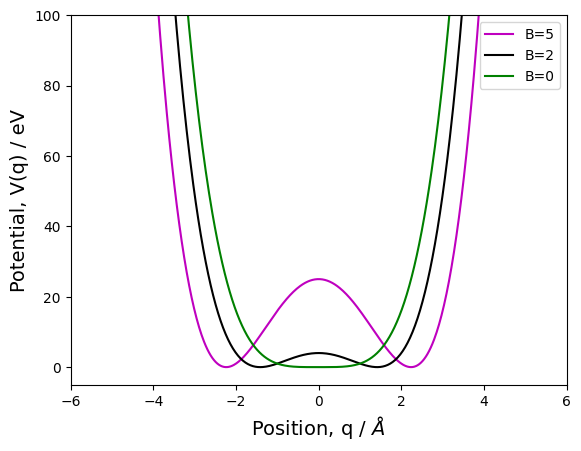

In [ ]:
plt.plot(q, potential1, "m")
plt.plot(q, potential2, "k")
plt.plot(q, potential3, "g")
plt.ylabel("Potential, V(q) / eV", fontsize=14)
plt.xlabel("Position, q / $\AA$", fontsize=14)
plt.ylim(-5, 100)
plt.xlim(-6, 6)
plt.legend(["B=5", "B=2", "B=0"])
#plt.savefig('doublewell_vVq.png')
plt.show()

### 2. Derivation of  QHD formulas

Here, we use the pysycomp library, able to derive the equations of motion in the QHD method. We will need to define the `q`, `p`, and `p2` variables. In order to do this, we must first calculate the first and second derivatives of the potential of interest, defined in section 1. We will also use a change of variables as well, described below.

Please note that because the potential is quadratic, we do not need a change of variables. 

**2.1 The First and Second Derivatives of the Potential**

To take the derivatives, we must represent the potential symbollically. This can be done by:

In [ ]:
# First, we must define all the parameters as stated in section 1 as symbols:

q, B= symbols("q, B")

# When computing symbolically, we do not need to use the numpy exponential function.

potential_sym =(q**2 - B)**2

Now that the potential is represented symbolically, we may take the first and second derivatives, described by `diff1` and `diff2`, respectively. Here you can use the `diff` function, which is found in the `sympy` library. This fuction takes the derivative symbolically with respect to the variable of interest, in this case `q`

In [ ]:
diff1 = diff(potential_sym, q)
diff2 = diff(diff1, q)

diff1, diff2

**2.2 Solving for the Equations of Motion**

In [ ]:
# Again, we must first define all variables as symbols. #

q, p, x, x2, xp, dt, mass, alpha, D = symbols("q, p, x, x2, xp, dt, mass, alpha, D")



########## EOM Calculations ##########

q1 = QHD_int(q, 1, dt)

#print(q1)

p1 = sympify(str(QHD_int(p, 1, dt)).replace("Derivative(v(q), q)", str(diff1)))

#print(p1)

p21 = sympify(str(QHD_int(p, 2, dt)).replace("Derivative(v(q), (q, 2))", str(diff2)).replace("Derivative(v(q), q)", str(diff1)))

#print(p21)

Now, we are ready to make plots of the data based on the EOM's as computed above.

## 3. Graphing

**3.1 Generating Time-Dependent Values**

We will first define all of the parameters necessary to perform the QHD calculations. The below parameters are defined as followed:

`hbar`: Plancks constant

`convert`: A conversion factor for the mass

`mass`: The mass of the particle in the potential. In this case, the mass of a hydrogen atom is used.

`q0`: The starting position value

`p0`: The starting momentum value

`s0`: The mean width

`ps0`: The mean width momentum

`B`: A constant in the double well potential

`dt`: The time step used

In [ ]:
##### Constants #####

hbar = 0.6582  # eV * fs

# Feel free to change any of the below parameters to observe what happens when you change them
q0 = 0.15
p0 = 0.0
s0 = 0.05
ps0 = 0.0
mass = 1

B = 0
dt = 0.1

Below, the initial conditions are described. These initial conditions describe a gaussian wavepacket, and do not need to be changed.

In [ ]:
##### Initial Conditions (Do Not Change) #####

t = 0.0    
Etot = 0.0
Etot0 = 0.0
Etot_cl = 0.0
Etot_cl0 = 0.0
q,p,pq,q2,p2 = 0.0, 0.0, 0.0, 0.0, 0.0
q, p = q0, p0
q_0 = 0.0
q2 = q*q + s0*s0
pq = ps0*s0 + q*p
p2 = p*p + ps0*ps0 + (0.5*hbar/s0)**2

p = eval(str(p1))
q = eval(str(q1))
p = eval(str(p1))

Below, empty lists are created to store the data generated. Feel free to create your own lists to examine how different variables change over time.

In [ ]:
##### Empty Lists for Data Storage: #####

q_list = []
p_list = []

**Q2.** Create an empty list for `q2` values and observe how this variable changes over time.

Now that the parameters have been defined, we can compute the desired values of position and momentum over a given time interval.

**Q3.** Try changing the time step (`dt`) or the finish time (`t_f`).

In [ ]:
### Time how long it takes to compute ###

import time 
begin = time.time()
print("Loading...")

dt = 0.1
t_i = 0.0
t_f = 1000

#### --- Do Not Change Anything Below --- #####

### Compute the y values ###

while t_i <= t_f:
    
    p = eval(str(p1))
    
    q = eval(str(q1))

    p = eval(str(p1))
    
    t_i = t_i + dt
   
    ##### --- #####

    # Here is where you add the lists to store data
    
    q_list.append(q)
    p_list.append(p)

    
### Compute the end time ###
    
time.sleep(1)
# store end time
end = time.time()
  
# total time taken
print(f"Total runtime is {end - begin}")

Loading...
Total runtime is 6.525593042373657


For the x values, we create a range with `(t_i, t_f, dt)` as the parameters. Due to the increasing nature of `t_i`, the initial value of `0.0` is used in its place.

In [ ]:
### Define the x values ###

if t_f == 1000 and dt == 0.1:
    t_f = t_f
else:
    t_f = t_f + dt

x_list = np.arange(0, t_f, dt)

**3.2 Graphing Position versus Time**

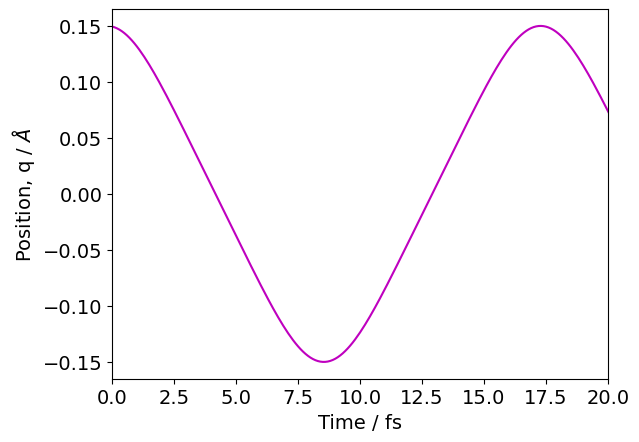

In [ ]:
x_list = np.arange(0, 1000, 0.1)
plt.plot(x_list, q_list, "m")
plt.xlim(0, t_f)
plt.xlabel("Time / fs", fontsize=14)
plt.ylabel("Position, q / $\AA$", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.savefig('doublewell_qVt_B5_-25.png')
plt.show()

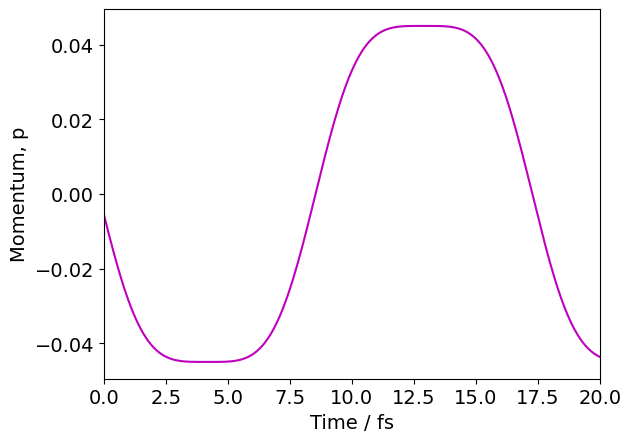

In [ ]:
plt.plot(x_list, p_list, 'm')
plt.xlim(0, t_f)
plt.xlabel("Time / fs", fontsize=14)
plt.ylabel("Momentum, p", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.savefig('double_well_pvt_B5_-25.png')
plt.show()

**Q4.** How does decreasing `B` affect the position and momentum? How does it affect the shape of the potential?

**Q5.** How does changing `q0` to `0.15` affect the position and momentum graphs?